In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
opj = os.path.join
import numpy as np
import yaml
import pickle
from datetime import datetime, timedelta
import time

try:
    from prfpy.stimulus import PRFStimulus2D
    from prfpy.model import Iso2DGaussianModel
    from prfpy.fit import Iso2DGaussianFitter
except:
    from prfpy_csenf.stimulus import PRFStimulus2D
    from prfpy_csenf.model import Iso2DGaussianModel
    from prfpy_csenf.fit import Iso2DGaussianFitter

from dag_prf_utils.utils import *
from dag_prf_utils.prfpy_ts_plotter import TSPlotter
from dag_prf_utils.prfpy_functions import *
from scot_habrok.load_saved_info import *

Could not find path for freeview, is freesurfer accessible from here?
Could not find FS_LICENSE, set using os.environ above
Error importing pycortex... Not a problem unless you want to use pycortex stuff
SUBJECTS_DIR not found in os.environ
Adding empty string...


In [3]:
cut_vols = 5
prf_settings_OLD = load_yml_settings('old')
prf_settings_NEW = load_yml_settings('old')
prf_settings = prf_settings_NEW
task = 'AS0'
design_matrix = get_design_matrix_npy(['AS0'])['AS0']         
design_matrix = design_matrix[:,:,cut_vols:]

prf_stim = PRFStimulus2D(
    screen_size_cm=prf_settings['screen_size_cm'],          # Distance of screen to eye
    screen_distance_cm=prf_settings['screen_distance_cm'],  # height of the screen (i.e., the diameter of the stimulated region)
    design_matrix=design_matrix,                            # dm (npix x npix x time_points)
    TR=prf_settings_OLD['TR'],                                  # TR
    )   
gg = Iso2DGaussianModel(
    stimulus=prf_stim,                                  # The stimulus we made earlier
    hrf=prf_settings['hrf']['pars'],                    # These are the parameters for the HRF that we normally use at Spinoza (with 7T data). (we can fit it, this will be done later...)
    normalize_RFs=prf_settings['normalize_RFs'],        # Normalize the volume of the RF (so that RFs w/ different sizes have the same volume. Generally not needed, as this can be solved using the beta values i.e.,amplitude)
    )


In [4]:
sub = 'sub-01'
model = 'gauss'
look_in = 'prf_NM_hrf4pt6_BL_full'
ts_data = load_data_tc(
    sub=sub,
    task_list=task,
    look_in=look_in,
)[task]
prf_data = load_data_prf(
    sub=sub,
    task_list=task,
    model_list=model,
    fit_stage='grid',
    look_in=look_in,
)[task][model]
prf_obj = TSPlotter(
        prf_params=prf_data,
        model=model, 
        prfpy_model=gg, #[i],
        real_ts=ts_data,)



/scratch/p307263/pilot1/derivatives/prf_NM_hrf4pt6_BL_full/sub-01/ses-1/sub-01_model-gauss_roi-all_task-AS0-fits_stage-grid_desc-prf_params.pkl
prf_params.shape[-1]=8
include hrf = True
include rsq = True


In [7]:
prf_obj.pd_params.bold_baseline.min()

0.0

{'tc-min-rsq': 0.1, 'nelder-min-rsq': 0.1}
{'tc-min-rsq': 0.1, 'nelder-min-rsq': 0.1}


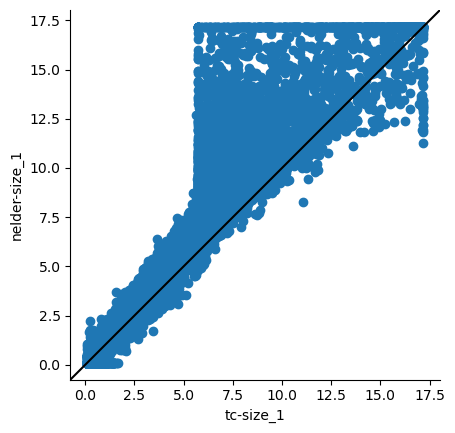

In [22]:
%matplotlib inline
for sub in sub_list:
    plt.figure()
    prf_multi[sub].scatter(
        'tc-size_1', 'nelder-size_1', 
        do_id_line=True,  #y_lim=[0,1],
        # dot_alpha=0.1,
    )

In [43]:
prf_objTC = TSPlotter(
    prf_params=prf_dataTC,
    model='gauss', 
    prfpy_model=gg,
    real_ts=ts_data,
)
prf_objBG = TSPlotter(
    prf_params=prf_dataBG,
    model='gauss', 
    prfpy_model=gg,
    real_ts=ts_data,
)
prf_objGR = TSPlotter(
    prf_params=prf_dataGR,
    model='gauss', 
    prfpy_model=gg,
    real_ts=ts_data,
)

prf_multi = PrfMulti(
    [prf_objBG, prf_objTC, prf_objGR], ['bg', 'tc', 'gr']
)


prf_params.shape[-1]=8
include hrf = True
include rsq = True
prf_params.shape[-1]=8
include hrf = True
include rsq = True
prf_params.shape[-1]=8
include hrf = True
include rsq = True


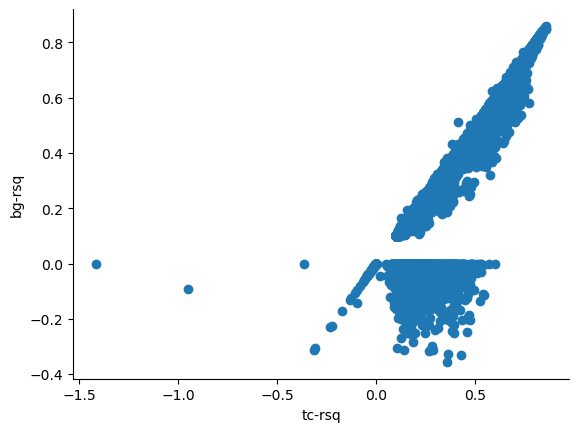

In [46]:
prf_multi.scatter('tc-rsq', 'bg-rsq', th={})

In [60]:
dag_make_custom_cmap(cmap_stack=['polar_starter', 'polar_starter_r'])
prf_multi.prf_obj['tc'].visual_field(dot_alpha=1, dot_size=1, dot_col='pol', dot_cmap='polar_starter', dot_vmin=-np.pi, dot_vmax=np.pi)

TypeError: dag_make_custom_cmap() got an unexpected keyword argument 'cmap_stack'